In [11]:
#import modules
import sqlite3
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
import matplotlib.pyplot as plt

In [2]:
# Create your connection.
cnx = sqlite3.connect('soccerdatabase.sqlite')
df = pd.read_sql_query("SELECT * FROM Player_Attributes", cnx)

In [3]:
df.head()

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,5,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


In [9]:
df.columns

Index(['id', 'player_fifa_api_id', 'player_api_id', 'date', 'overall_rating',
       'potential', 'preferred_foot', 'attacking_work_rate',
       'defensive_work_rate', 'crossing', 'finishing', 'heading_accuracy',
       'short_passing', 'volleys', 'dribbling', 'curve', 'free_kick_accuracy',
       'long_passing', 'ball_control', 'acceleration', 'sprint_speed',
       'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina',
       'strength', 'long_shots', 'aggression', 'interceptions', 'positioning',
       'vision', 'penalties', 'marking', 'standing_tackle', 'sliding_tackle',
       'gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning',
       'gk_reflexes'],
      dtype='object')

In [20]:
#remove useless ID columns/data
df.drop('player_fifa_api_id', axis=1, inplace=True)
df.drop('player_api_id', axis=1, inplace=True)

In [23]:
pd.set_option('display.max_columns', None)
df.head()

,id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,long_passing,ball_control,acceleration,sprint_speed,agility,reactions,balance,shot_power,jumping,stamina,strength,long_shots,aggression,interceptions,positioning,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,71.0,70.0,45.0,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,71.0,70.0,45.0,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,3,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,63.0,41.0,45.0,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,4,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,43.0,70.0,60.0,43.0,50.0,44.0,38.0,63.0,48.0,60.0,64.0,59.0,46.0,65.0,54.0,58.0,54.0,76.0,34.0,62.0,40.0,44.0,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,5,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,43.0,70.0,60.0,43.0,50.0,44.0,38.0,63.0,48.0,60.0,64.0,59.0,46.0,65.0,54.0,58.0,54.0,76.0,34.0,62.0,40.0,44.0,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


In [27]:
#looking at the categorical data
print(df.preferred_foot.unique())
print(df.attacking_work_rate.unique())
print(df.defensive_work_rate.unique())

['right' 'left' None]
['medium' 'high' None 'low' 'None' 'le' 'norm' 'stoc' 'y']
['medium' 'high' 'low' '_0' None '5' 'ean' 'o' '1' 'ormal' '7' '2' '8' '4'
 'tocky' '0' '3' '6' '9' 'es']


In [50]:
#attacking and defensive_work_rate have inconsistent and trash data, so I'll drop those columns
df.drop('attacking_work_rate', axis=1, inplace=True)
df.drop('defensive_work_rate', axis=1, inplace=True)
#going to drop the date column too
df.drop('date', axis=1, inplace=True)

In [34]:
#change right and left to numeric values for preferred_foot
df.fillna(0, inplace=True)
df.loc[df.preferred_foot == 'right', 'preferred_foot'] = 1
df.loc[df.preferred_foot == 'left', 'preferred_foot'] = 2

In [97]:
y=df.overall_rating

In [98]:
x=df.drop('overall_rating', axis=1)

In [99]:
X_Train,X_Test,y_Train,y_Test = train_test_split(x,y,test_size = 0.3,random_state=50)
lm = LinearRegression()
lm.fit(X_Train,y_Train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [100]:
print("Estimated intercept coefficient:", lm.intercept_)
print("Number of coeffients:", len(lm.coef_))

Estimated intercept coefficient: -1.9228618680914025
Number of coeffients: 36


In [101]:
coefs= zip(x.columns, lm.coef_)

In [102]:
pd.DataFrame(list(zip(x.columns, lm.coef_)), columns=['features','EstimatedCoefficent'])

,features,EstimatedCoefficent
0,id,2.038839e-07
1,potential,3.706537e-01
2,preferred_foot,-8.152233e-02
3,crossing,2.226491e-02
4,finishing,1.014823e-02
5,heading_accuracy,6.938991e-02
6,short_passing,4.684679e-02
7,volleys,4.006124e-03
8,dribbling,-1.124059e-02
9,curve,1.218872e-02


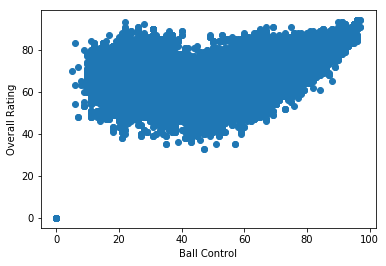

In [76]:
#So these correlations all look very small.  I'll check out a few of the better ones.  I'll leave out 'potential' as my guess is
#that is a score of how much the player is believed to be able to improve, and not a real performance stat.
plt.scatter(df.ball_control, df.overall_rating)
plt.xlabel("Ball Control")
plt.ylabel("Overall Rating")
plt.show()

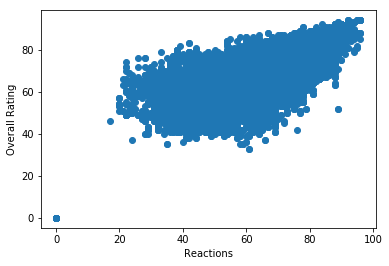

In [77]:
plt.scatter(df.reactions, df.overall_rating)
plt.xlabel("Reactions")
plt.ylabel("Overall Rating")
plt.show()

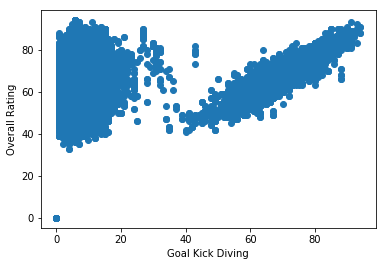

In [78]:
plt.scatter(df.gk_diving, df.overall_rating)
plt.xlabel("Goal Kick Diving")
plt.ylabel("Overall Rating")
plt.show()

In [103]:
#Reactions seems to have the best linear relationship out of the candidates.
lm.predict(x)[0:5]

array([61.51685351, 61.51685371, 59.12198348, 57.93570617, 57.93570637])

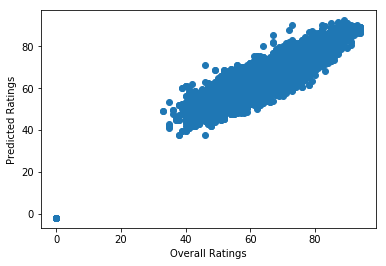

In [82]:
#plot of overall_rating and the predicted scores
plt.scatter(df.overall_rating, lm.predict(x))
plt.ylabel("Predicted Ratings")
plt.xlabel("Overall Ratings")
plt.show()

In [104]:
#look at the sum of squares errors
import numpy as np
np.sum(np.square(lm.predict(X_Train)-y_Train))

1011524.2877034824

In [105]:
np.sum(np.square(lm.predict(X_Test)-y_Test))

434678.9764728245

So the SSE was more than cut in half between the training data and testing data, which means the regression and prediction helped.
Let's try to do better by looking at a couple of the better candidates.

In [106]:
react = df.reactions
ball=df.ball_control
RandBC= pd.concat([react,ball], axis=1)

In [107]:
X_Train,X_Test,y_Train,y_Test = train_test_split(RandBC,y,test_size = 0.3,random_state=50)
lm = LinearRegression()
lm.fit(X_Train,y_Train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [108]:
print("Estimated intercept coefficient:", lm.intercept_)
print("Number of coeffients:", len(lm.coef_))

Estimated intercept coefficient: 23.238736373068647
Number of coeffients: 2


In [109]:
np.sum(np.square(lm.predict(X_Train)-y_Train))

2894638.737991259

In [110]:
np.sum(np.square(lm.predict(X_Test)-y_Test))

1250117.3456411185

So isolating just the ball control and reactions introduced a lot more variability with the 2.8 million SSE training score, but the SSE of the testing data show a nearly 60% drop.  So i think we got a better improvement with the isolation of those two factors

In [113]:
import statsmodels.formula.api as smf
lm = smf.ols(formula='overall_rating ~ reactions+ball_control', data=df).fit()
lm.conf_int()

,0,1
Intercept,22.835985,23.122628
reactions,0.622838,0.627788
ball_control,0.064351,0.067544


In [114]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         overall_rating   R-squared:                       0.681
Model:                            OLS   Adj. R-squared:                  0.681
Method:                 Least Squares   F-statistic:                 1.965e+05
Date:                Thu, 17 Jan 2019   Prob (F-statistic):               0.00
Time:                        17:14:34   Log-Likelihood:            -5.4757e+05
No. Observations:              183978   AIC:                         1.095e+06
Df Residuals:                  183975   BIC:                         1.095e+06
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       22.9793      0.073    314.251      0.000      22.836      23.123
reactions        0.6253      0.001    495.156      0.000       0.623       0.628
ball_control     0.0659      0.001     80.960      0.000       0.064       0.068
==============================================================================
Omnibus:                    19507.731   Durbin-Watson:                   0.493
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           148364.177
Skew:                          -0.215   Prob(JB):                         0.00
Kurtosis:                       7.378   Cond. No.                         612.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The P values for both Reactions and Ball Control are very low, which means they should be good predictors of overall performance.

R-squared value looks good initially but we would need to have more domain knowledge to know for sure.